In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
X,y= datasets.load_wine(return_X_y= True)

In [17]:
print(X.shape)
print(y.shape)
print(type(y))

(178, 13)
(178,)
<class 'numpy.ndarray'>


In [5]:
X_train, X_test, y_train, y_test= train_test_split(
    X, y, test_size= .3, random_state= 1)
X_train, X_unl, y_train, y_unl= train_test_split(
    X_train, y_train, test_size= .7, random_state= 1)

In [6]:
print(X_train.shape)
print(X_test.shape)
print(X_unl.shape)


(37, 13)
(54, 13)
(87, 13)


In [7]:
type(X_train)

numpy.ndarray

In [9]:
clf= svm.SVC(kernel= 'linear', probability= True, C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9259259259259259

In [10]:
clp= clf.predict_proba(X_unl)
lab= clf.predict(X_unl)

In [11]:
clp

array([[0.42003181, 0.47795058, 0.10201761],
       [0.20595554, 0.52067765, 0.27336681],
       [0.45480594, 0.40310585, 0.1420882 ],
       [0.17482056, 0.20656905, 0.61861039],
       [0.26070061, 0.64925922, 0.09004017],
       [0.20499739, 0.67393091, 0.1210717 ],
       [0.14226252, 0.7586694 , 0.09906808],
       [0.67780338, 0.23821732, 0.0839793 ],
       [0.17749549, 0.7046608 , 0.11784371],
       [0.2516777 , 0.08628949, 0.66203281],
       [0.14025267, 0.59539045, 0.26435689],
       [0.45965376, 0.3744932 , 0.16585304],
       [0.27879583, 0.12188059, 0.59932359],
       [0.37962253, 0.17135052, 0.44902695],
       [0.15226965, 0.70692658, 0.14080377],
       [0.14226807, 0.47207602, 0.38565591],
       [0.38633045, 0.47799847, 0.13567108],
       [0.144852  , 0.78714153, 0.06800647],
       [0.14685964, 0.2561076 , 0.59703276],
       [0.17146658, 0.38723559, 0.44129782],
       [0.15613004, 0.59553007, 0.24833989],
       [0.52843527, 0.35820369, 0.11336104],
       [0.

In [12]:
lab

array([0, 2, 0, 2, 1, 1, 1, 0, 1, 2, 1, 0, 2, 0, 1, 2, 0, 1, 2, 2, 1, 0,
       0, 2, 2, 0, 1, 2, 2, 0, 0, 1, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 2, 0, 0, 1, 0, 1, 2, 2, 1, 1, 2, 2, 1, 0, 1, 0, 2,
       0, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 2, 2, 0, 1, 2, 0, 2, 1, 0, 1])

In [18]:
df= pd.DataFrame(clp, columns= ['C1prob', 'C2prob', 'C3prob'])
df['lab']= lab
df['max']= df[['C1prob', 'C2prob', 'C3prob']].max(axis=1)
df

,C1prob,C2prob,C3prob,lab,max
0,0.420032,0.477951,0.102018,0,0.477951
1,0.205956,0.520678,0.273367,2,0.520678
2,0.454806,0.403106,0.142088,0,0.454806
3,0.174821,0.206569,0.618610,2,0.618610
4,0.260701,0.649259,0.090040,1,0.649259
...,...,...,...,...,...
82,0.335266,0.537946,0.126788,0,0.537946
83,0.237941,0.086755,0.675304,2,0.675304
84,0.172210,0.745563,0.082227,1,0.745563
85,0.293941,0.482504,0.223555,0,0.482504


(array([ 2.,  7., 12., 11.,  4., 13., 12.,  9., 12.,  5.]),
 array([0.37362523, 0.41497686, 0.45632849, 0.49768012, 0.53903175,
        0.58038338, 0.62173501, 0.66308664, 0.70443827, 0.7457899 ,
        0.78714153]),
 <a list of 10 Patch objects>)

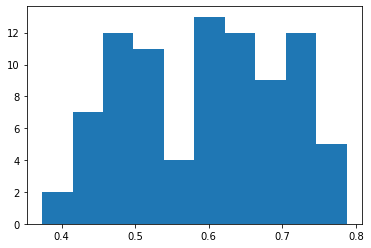

In [19]:
plt.hist(df['max'])

In [20]:
nc= np.arange(.35, 1, .03)
acc= np.empty(22)
i=0
for k in np.nditer(nc):
    conf_ind= df['max'] > k
    X_train1= np.append(X_train, X_unl[conf_ind, :], axis=0)
    y_train1= np.append(y_train, df.loc[conf_ind, ['lab']])
    clf= svm.SVC(kernel= 'linear', probability= True, C=1).fit(X_train1, y_train1)
    acc[i]= clf.score(X_test, y_test)
    i= i+1

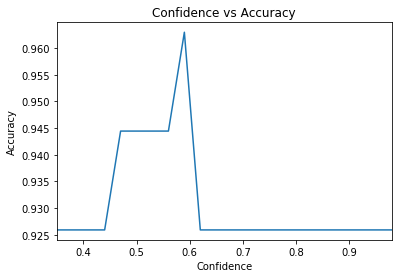

In [21]:
"Confidence vs Accuracy"
x= pd.Series(acc, index=nc)
x.plot()
plt.title("Confidence vs Accuracy")
plt.xlabel('Confidence')
plt.ylabel('Accuracy')
plt.show()

In [22]:
x

0.35    0.925926
0.38    0.925926
0.41    0.925926
0.44    0.925926
0.47    0.944444
0.50    0.944444
0.53    0.944444
0.56    0.944444
0.59    0.962963
0.62    0.925926
0.65    0.925926
0.68    0.925926
0.71    0.925926
0.74    0.925926
0.77    0.925926
0.80    0.925926
0.83    0.925926
0.86    0.925926
0.89    0.925926
0.92    0.925926
0.95    0.925926
0.98    0.925926
dtype: float64

In [26]:
conf_ind= df['max'] > .6
X_train2= np.append(X_train, X_unl[conf_ind, :], axis=0)
y_train2= np.append(y_train, df.loc[conf_ind, ['lab']])
clf= svm.SVC(kernel= 'linear', probability= True, C=1).fit(X_train2, y_train2)
acc= clf.score(X_test, y_test)
acc

0.9629629629629629